In [4]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import miscGeneralMethods
import seaborn as sns
import statistics

In [5]:
def setConstants():
    global REPLICATES
    global GENERATIONS
    global REPOSITORY
    global FILE_FITNESS
    global FILE_DESCRIPTORS
    global VARIABLE_1_PARAMETERS
    global VARIABLE_2_PARAMETERS
    global VARIABLE_1_NAME
    global VARIABLE_2_NAME
    REPOSITORY='/home/edgar/are-logs/oscillatory_controller/'
    REPLICATES = 20
    GENERATIONS = 99
    FILE_FITNESS = 'fitnesses.csv'
    FILE_DESCRIPTORS = 'MD_Cart_WDH.csv'
    VARIABLE_1_NAME = 'Evaluations'
    VARIABLE_2_NAME = 'Time'
    VARIABLE_1_PARAMETERS = ['2000']
    VARIABLE_2_PARAMETERS = ['30','60','90','120']
    print('Repository: ' + REPOSITORY)
    print('Replicates: ' + str(REPLICATES))
    print('Descriptors: ' + str(FILE_DESCRIPTORS))
    print('File: ' + FILE_FITNESS)

In [6]:
def getFitnessMeanAndMax(dataArray, REPLICATES, GENERATIONS, numObj, obj):
    print("Get fitness...")
    rep_mean = []
    rep_max = []
    rep_fitness = []
    for i in range(REPLICATES):
        exp_mean = []
        exp_max = []
        list_fitness = []
        for j in range(GENERATIONS):
                tempVal = []
                for k in range(2+obj,len(dataArray[i][j]),numObj):
                    tempVal.append(dataArray[i][j][k])
                    list_fitness.append(dataArray[i][j][k])
                exp_mean.append(np.mean(tempVal))
                exp_max.append(np.max(tempVal))
        rep_mean.append(exp_mean)
        rep_max.append(exp_max)
        rep_fitness.append(list_fitness)
    array_mean = np.array([[float(y) for y in x] for x in rep_mean])
    array_max = np.array([[float(y) for y in x] for x in rep_max])    
    df_mean = pd.DataFrame(array_mean).melt()
    df_max = pd.DataFrame(array_max).melt()
    return df_mean, df_max, rep_fitness, array_mean, array_max
def plotSwarmRep(REPOSITORY, REPLICATES, rep_fitness, rep_descriptors, organType):
    print("Plotting Swarm...")
    if(organType == 1):
        label = "Wheels"
        column = 6
    if(organType == 2):
        label = "Sensors"
        column = 7
    if(organType == 3):
        label = "Joints"
        column = 8
    list_descriptors = []
    list_fitness = []
    for i in range(REPLICATES):
        list_fitness.extend(rep_fitness[i])
        list_descriptors.extend(rep_descriptors[i][:len(rep_fitness[i]),column])
    fig = plt.figure(facecolor='white')
    sns.boxplot(x=list_descriptors, y=list_fitness, whis=np.inf,width=0.95)
#     sns.swarmplot(x=list_descriptors,y=list_fitness,size=2.0,color="black", edgecolor="black")
    sns.swarmplot(x=rep_descriptors[0][:len(rep_fitness[0]),column],y=rep_fitness[0],size=4.0,color="black", edgecolor="black")
    plt.xlabel(label)
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    TICKPOS =  range(8+1)
    TICKLABEL = range(8+1)
    plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.savefig(REPOSITORY+'/' + label + 'swarmPlot.png',dpi=200, bbox_inches='tight')
    plt.close(fig)

In [7]:
setConstants()
font = {'weight' : 'normal',
                    'size'   : 14.0}
plt.rc('font', **font)
bud_folders = []
bud_mean_fitness = []
bud_max_fitness = []
bud_mean_novelty = []
bud_max_novelty = []
bud_mean_combination = []
bud_max_combination = []
bud_fitness = []
bud_descriptors = []
bud_array_max_fitness = []
bud_array_mean_fitness = []
for var1 in VARIABLE_1_PARAMETERS:  
    print('---',var1,'---')
    exp_folders = []
    exp_mean_fitness = []
    exp_max_fitness = []
    exp_fitness = []
    exp_descriptors = []
    exp_array_mean_fitness = []
    exp_array_max_fitness = []
    for var2 in VARIABLE_2_PARAMETERS:
        print('------',var2,'------')
        folders,folderNames = miscGeneralMethods.getDirectories(REPOSITORY + var1 + '/' + var2)
        exp_folders.append(folders)
        dataFitnesses = miscGeneralMethods.getDataFromFiles(folders, FILE_FITNESS, 1)
        arrayFitnesses = miscGeneralMethods.transformDataToArray(dataFitnesses, REPLICATES)
        df_mean, df_max, rep_fitness, array_mean, array_max = getFitnessMeanAndMax(arrayFitnesses, REPLICATES, GENERATIONS, 2, 2)
        exp_mean_fitness.append(df_mean)
        exp_max_fitness.append(df_max)

#         dataDescriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_DESCRIPTORS, 0)
#         arrayDescriptors = miscGeneralMethods.transformDataToArray(dataDescriptors, REPLICATES)

#         plotSwarmRep(REPOSITORY + bud + '/' + exp, REPLICATES, rep_fitness, arrayDescriptors, 1)
#         plotSwarmRep(REPOSITORY + bud + '/' + exp, REPLICATES, rep_fitness, arrayDescriptors, 2)
#         plotSwarmRep(REPOSITORY + bud + '/' + exp, REPLICATES, rep_fitness, arrayDescriptors, 3)

        exp_fitness.append(rep_fitness)
#         exp_descriptors.append(arrayDescriptors)
        
        exp_array_mean_fitness.append(array_mean)
        exp_array_max_fitness.append(array_max)
    bud_folders.append(exp_folders)
    bud_mean_fitness.append(exp_mean_fitness)
    bud_max_fitness.append(exp_max_fitness)
    bud_fitness.append(exp_fitness)
    bud_descriptors.append(exp_descriptors)
    bud_array_max_fitness.append(exp_array_max_fitness)
    bud_array_mean_fitness.append(exp_array_mean_fitness)

Repository: /home/edgar/are-logs/oscillatory_controller/
Replicates: 20
Descriptors: MD_Cart_WDH.csv
File: fitnesses.csv
--- 2000 ---
------ 30 ------
Getting directories...
--- Folders:  20
Getting data from files...
Transform data to array...
Get fitness...
------ 60 ------
Getting directories...
--- Folders:  20
Getting data from files...
Transform data to array...
Get fitness...
------ 90 ------
Getting directories...
--- Folders:  20
Getting data from files...
Transform data to array...
Get fitness...
------ 120 ------
Getting directories...
--- Folders:  20
Getting data from files...
Transform data to array...
Get fitness...


/home/edgar/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edgar/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edgar/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edgar/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edgar/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

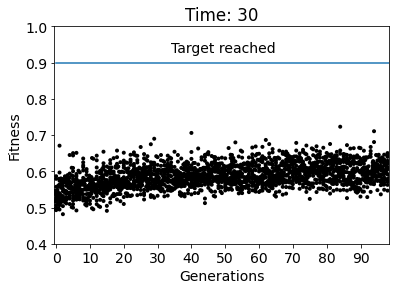

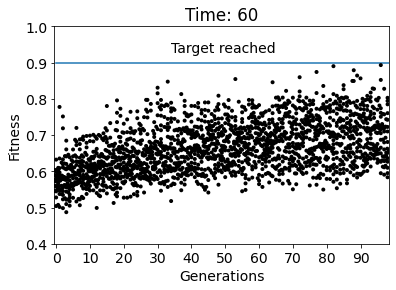

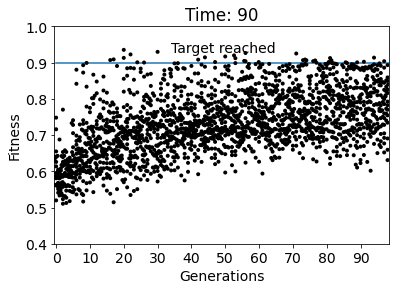

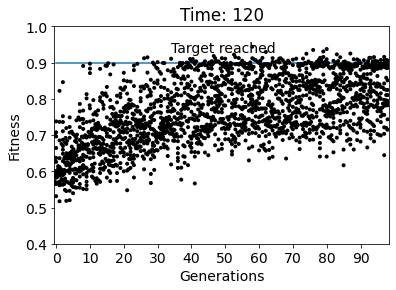

In [8]:
for var1 in range(len(VARIABLE_1_PARAMETERS)):
    for var2 in range(len(VARIABLE_2_PARAMETERS)):
        fig = plt.figure(facecolor='white')
        sns.swarmplot(x="variable", y="value",data=bud_max_fitness[0][var2],size=4.0,color="black", edgecolor="black")
        plt.title(VARIABLE_2_NAME + ': ' + VARIABLE_2_PARAMETERS[var2])
        plt.xlabel('Generations')
        plt.ylabel('Fitness')
        plt.ylim([0.4,1.0])
        plt.plot([0,GENERATIONS], [0.9,0.9])
        plt.text(GENERATIONS/2,0.93,'Target reached',horizontalalignment='center')
        TICKLABEL = range(0,GENERATIONS,10)
        TICKPOS = range(0,GENERATIONS,10)
        plt.xticks(TICKPOS,TICKLABEL)
        plt.savefig(REPOSITORY+ VARIABLE_1_PARAMETERS[var1] +'/' + VARIABLE_2_PARAMETERS[var2] + 'Mean.png',dpi=200, bbox_inches='tight')

In [9]:
target_reached_var1 = []
for var1 in range(len(VARIABLE_1_PARAMETERS)):
#     print("-", var1)
    target_reached_var2 = []
    for var2 in range(len(VARIABLE_2_PARAMETERS)):
#         print("--", var2)
        target_reached_rep = []
        for rep in range(REPLICATES):
#             print("---", rep)
            for gen in range(GENERATIONS):
#                 print(bud_array_max_fitness[var1][var2][rep][gen])
                if(bud_array_max_fitness[var1][var2][rep][gen] > 0.9):
#                    print(gen)
                   target_reached_rep.append(gen) 
                   break 
            if(gen == (GENERATIONS - 1)):
                target_reached_rep.append(100)
        print(target_reached_rep)
        print(statistics.median(target_reached_rep))
        target_reached_var2.append(target_reached_rep)
    target_reached_var1.append(target_reached_var2)
# print(statistics.median(target_reached_var1[0][3]))

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
100.0
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
100.0
[100, 81, 100, 44, 100, 20, 100, 76, 42, 100, 100, 53, 100, 16, 100, 74, 24, 50, 20, 17]
75.0
[48, 27, 47, 46, 92, 44, 82, 47, 34, 40, 26, 64, 41, 62, 78, 39, 47, 58, 76, 30]
47.0


30
60
90
120


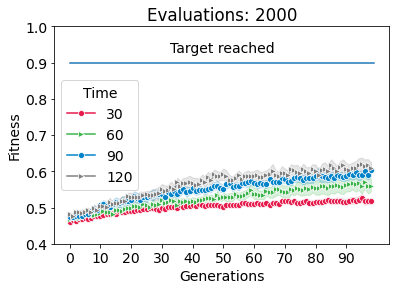

In [12]:
markers = ['o','>','o','>','o','>','o']
colours = [[230/255,25/255,75/255],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0]]
colorIndex = [0,4,6,9]
labels = []
for i in VARIABLE_2_PARAMETERS:
    temp = str(int(i))
    labels.append(temp)
    print(temp)
for var1 in range(len(VARIABLE_1_PARAMETERS)): 
    fig = plt.figure(facecolor='white')
    for var2 in range(len(VARIABLE_2_PARAMETERS)):
        sns.lineplot(x="variable", y="value", data = bud_mean_fitness[var1][var2], marker=markers[var2], color = colours[colorIndex[var2]])
    plt.title(VARIABLE_1_NAME + ': ' + VARIABLE_1_PARAMETERS[var1])
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.ylim([0.4,1.0])
    plt.plot([0,GENERATIONS], [0.9,0.9])
    plt.text(GENERATIONS/2,0.93,'Target reached',horizontalalignment='center')
    TICKLABEL = range(0,GENERATIONS,10)
    TICKPOS = range(0,GENERATIONS,10)
    plt.xticks(TICKPOS,TICKLABEL)
    plt.legend(VARIABLE_2_PARAMETERS,title=VARIABLE_2_NAME)
    plt.savefig(REPOSITORY+ VARIABLE_1_PARAMETERS[var1] +'/Mean.png',dpi=200, bbox_inches='tight')

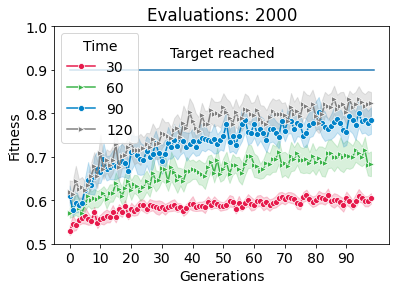

In [11]:
markers = ['o','>','o','>','o','>','o']
colours = [[230/255,25/255,75/255],[245/255,130/255,48/255],[255/255,255/255,25/255],[210/255,245/255,60/255],[60/255,180/255,75/255],[70/255,240/255,240/255],[0/255,130/255,200/255],[145/255,30/255,180/255],[240/255,50/255,230/255],[128/255,128/255,128/255],[0,0,0]]
colorIndex = [0,4,6,9]
for var1 in range(len(VARIABLE_1_PARAMETERS)): 
    fig = plt.figure(facecolor='white')
    for var2 in range(len(VARIABLE_2_PARAMETERS)):
        sns.lineplot(x="variable", y="value", data = bud_max_fitness[var1][var2], marker=markers[var2], color = colours[colorIndex[var2]])
    plt.title(VARIABLE_1_NAME + ': ' + VARIABLE_1_PARAMETERS[var1])
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.plot([0,GENERATIONS], [0.9,0.9])
    plt.text(GENERATIONS/2,0.93,'Target reached',horizontalalignment='center')
    plt.ylim([0.5,1.0])
    TICKLABEL = range(0,GENERATIONS,10)
    TICKPOS = range(0,GENERATIONS,10)
    plt.xticks(TICKPOS,TICKLABEL)
    plt.legend(VARIABLE_2_PARAMETERS,title=VARIABLE_2_NAME)
    plt.savefig(REPOSITORY + VARIABLE_1_PARAMETERS[var1] + '/Best.png',dpi=200, bbox_inches='tight')

In [11]:
from scipy.stats import mannwhitneyu
# print(bud_max_fitness[bud][0])
for bud in range(len(BUDGETS)):
    print(bud)
    tempDat0 = np.array([[float(y) for y in x] for x in bud_array_mean_fitness[bud][0]])
    tempDat1 = np.array([[float(y) for y in x] for x in bud_array_mean_fitness[bud][1]])
    tempDat2 = np.array([[float(y) for y in x] for x in bud_array_mean_fitness[bud][2]])
    tempDat3 = np.array([[float(y) for y in x] for x in bud_array_mean_fitness[bud][3]])

    temp_list0 = []
    temp_list1 = []
    temp_list2 = []
    for i in range(len(tempDat1[0])):
    #     print(i)
        out0 = [x[i] for x in tempDat0]
        out1 = [x[i] for x in tempDat1]
        out2 = [x[i] for x in tempDat2]
        out3 = [x[i] for x in tempDat3]
    #     print(len(out1))
        # print(tempDat[:][0])
        
        stat,p = mannwhitneyu(out0,out1)
    #     print("---",p)
        #temp_list0.append(round(p, 3))
        temp_list0.append(p<0.05)
        stat,p = mannwhitneyu(out1,out2)
    #     print("---",p)
        #temp_list1.append(round(p, 3))
        temp_list1.append(p<0.05)
        
        stat,p = mannwhitneyu(out2,out3)
    #     print("---",p)
        #temp_list1.append(round(p, 3))
        temp_list2.append(p<0.05)
#     plt.plot(temp_list)
#     plt.ylim([0,1])
    print(temp_list0)
    print(temp_list1)
    print(temp_list2)

NameError: name 'BUDGETS' is not defined

In [38]:
experiment = 1
folderNum = 18
for i in range(len(exp_fitness[experiment])):
    print(exp_folders[experiment][i])
    for j in range(len(exp_fitness[experiment][i])):
        if(exp_fitness[experiment][i][j] > 0.7):
    #         if(exp_descriptors[experiment][folderNum][i,7]>0/32 and exp_descriptors[experiment][folderNum][i,7] < 32/32):
    #             print("Fit:",exp_fitness[experiment][folderNum][i], "Gen: ", exp_descriptors[experiment][folderNum][i,0], "Ind: ", exp_descriptors[experiment][folderNum][i,1], "W: ", exp_descriptors[experiment][folderNum][i,6], "S: ", exp_descriptors[experiment][folderNum][i,7])
            print("Fit:",exp_fitness[experiment][i][j], "Gen: ", exp_descriptors[experiment][i][j,0], "Ind: ", exp_descriptors[experiment][i][j,1], "W: ", exp_descriptors[experiment][i][j,6], "S: ", exp_descriptors[experiment][i][j,7])

/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_multitarget_27_0_11-45-4-4170-2721938922
/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_multitarget_27_0_11-45-4-4110-3260620855
Fit: 0.709334 Gen:  4.0 Ind:  9.0 W:  0.1875 S:  0.0
/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_multitarget_27_0_11-45-4-4168-3616290631
Fit: 0.70739 Gen:  5.0 Ind:  2.0 W:  0.25 S:  0.0
/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_multitarget_27_0_11-45-4-4169-3591756951
/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_multitarget_27_0_11-45-4-4093-1188035908
Fit: 0.808112 Gen:  5.0 Ind:  0.0 W:  0.25 S:  0.0
Fit: 0.807112 Gen:  5.0 Ind:  9.0 W:  0.25 S:  0.0
/home/ebb505/ARE_Project/are-logs/objectManipulation/newOrganModels/learningBudget/300_2/1/object_mu

In [24]:
FILE_DETAILS='robotsTarget.csv'
bud_mean = []
bud_total_robots = []
bud_viable_robots = []
for bud in range(len(BUDGETS)): 
    with open(REPOSITORY + BUDGETS[bud] +'/' + FILE_DETAILS, 'w', newline='') as write_obj:
        csv_writer = csv.writer(write_obj)
        organ = 7
        exp_mean = []
        exp_total_robots = []
        exp_viable_robots = []
        for exp in range(len(EXPERIMENTS)):
            csv_writer.writerow([exp])
#             print("---",exp,"---")
            organList = []
            for organsNumber in range(7):
                tempRep = []
                for rep in range(REPLICATES):
                    organsNum = 0
                    for i in range(len(bud_fitness[bud][exp][rep])):
                        if(bud_fitness[bud][exp][rep][i] > 0.9):
                            if(bud_descriptors[bud][exp][rep][i,organ] > ((organsNumber*2 - 1)/32) and bud_descriptors[bud][exp][rep][i,organ] < ((organsNumber*2 + 1)/32)):
                                organsNum = organsNum + 1 
                    tempRep.append(organsNum)
                organList.append(tempRep)
                csv_writer.writerow(tempRep)
            # Total robots
            totalRobots_list = []
            for i in range(len(organList[0])):
                totalRobots_list.append(organList[0][i] + organList[1][i] + organList[2][i] + organList[3][i] + organList[4][i] + organList[5][i] + organList[6][i])

            viableRobots_list = []
            for i in range(len(organList[0])):
                viableRobots_list.append(organList[1][i] + organList[2][i] + organList[3][i] + organList[4][i] + organList[5][i] + organList[6][i])
    #         temp_list = [np.median(organList[0]), np.median(organList[1]), np.median(organList[2]), np.median(organList[3]), np.median(organList[4]), np.median(organList[5]), np.median(organList[6]), np.median(viableRobots_list), np.percentile(viableRobots_list,25), np.percentile(viableRobots_list,75)]
    #         temp_list = [np.sum(organList[0]), np.sum(organList[1]), np.sum(organList[2]), np.sum(organList[3]), np.sum(organList[4]), np.sum(organList[5]), np.sum(organList[6]), np.max(viableRobots_list)]

    #         temp_list = [np.median(organList[0]), np.median(organList[1]), np.median(organList[2]), np.median(organList[3]), np.median(organList[4]), np.median(organList[5]), np.median(organList[6]), np.percentile(totalRobots_list,25), np.median(totalRobots_list), np.percentile(totalRobots_list,75)]
    #         temp_list = [np.mean(organList[0]), np.mean(organList[1]), np.mean(organList[2]), np.mean(organList[3]), np.mean(organList[4]), np.mean(organList[5]), np.mean(organList[6]), np.mean(totalRobots_list)]

    #         temp_list = [np.max(organList[0]), np.max(organList[1]), np.max(organList[2]), np.max(organList[3]), np.max(organList[4]), np.max(organList[5]), np.max(organList[6]), np.median(totalRobots_list)]
            temp_list = [np.sum(organList[0]), np.sum(organList[1]), np.sum(organList[2]), np.sum(organList[3]), np.sum(organList[4]), np.sum(organList[5]), np.sum(organList[6]), np.sum(totalRobots_list)]
            
            exp_mean.append(temp_list)
            exp_total_robots.append(totalRobots_list)
            exp_viable_robots.append(viableRobots_list)
#             print(totalRobots_list)
#             print(temp_list)
        bud_mean.append(temp_list)
        bud_total_robots.append(exp_total_robots)
        bud_viable_robots.append(exp_viable_robots)

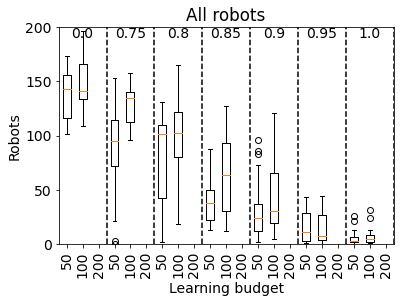

In [32]:
list_ordered = []
for exp in range(len(EXPERIMENTS)):
    list_ordered.append(bud_total_robots[0][exp])
    list_ordered.append(bud_total_robots[1][exp])
#     list_ordered.append(bud_total_robots[2][exp])
    list_ordered.append(0)
fig = plt.figure(facecolor='white')
plt.boxplot(list_ordered)  

# plt.xticks(TICKPOS,EXPERIMENTS)
tickPos = range(1,len(EXPERIMENTS)*3+1,1)
tickLegend = []
for i in range(len(EXPERIMENTS)):
    tickLegend = tickLegend + [50,100,200]
plt.xticks(tickPos, tickLegend)
plt.xticks(rotation=90)

plt.ylim([0,200])
tickPos =  [2,5,8,11,14,17,20]
labels = []
for i in EXPERIMENTS:
    temp = str(int(i)/100)
    labels.append(temp)
for exp in range(len(EXPERIMENTS)): 
    plt.text(tickPos[exp],190,labels[exp],horizontalalignment='center')
    plt.plot([tickPos[exp]+1.5,tickPos[exp]+1.5],[0,250],'k--')  
plt.xlabel('Learning budget')
plt.ylabel('Robots') 
plt.title('All robots')
plt.savefig(REPOSITORY + '/AllRobots.png',dpi=200, bbox_inches='tight')    

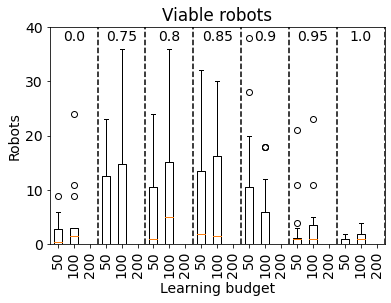

In [37]:
list_ordered = []
for exp in range(len(EXPERIMENTS)):
    list_ordered.append(bud_viable_robots[0][exp])
    list_ordered.append(bud_viable_robots[1][exp])
#     list_ordered.append(bud_viable_robots[2][exp])
    list_ordered.append(0)
fig = plt.figure(facecolor='white')
plt.boxplot(list_ordered)  

# plt.xticks(TICKPOS,EXPERIMENTS)
tickPos = range(1,len(EXPERIMENTS)*3+1,1)
tickLegend = []
for i in range(len(EXPERIMENTS)):
    tickLegend = tickLegend + [50,100,200]
plt.xticks(tickPos, tickLegend)
plt.xticks(rotation=90)

plt.ylim([0,40])
tickPos =  [2,5,8,11,14,17,20]
labels = []
for i in EXPERIMENTS:
    temp = str(int(i)/100)
    labels.append(temp)
for exp in range(len(EXPERIMENTS)): 
    plt.text(tickPos[exp],37.5,labels[exp],horizontalalignment='center')
    plt.plot([tickPos[exp]+1.5,tickPos[exp]+1.5],[0,250],'k--')  
plt.xlabel('Learning budget')
plt.ylabel('Robots') 
plt.title('Viable robots')
plt.savefig(REPOSITORY + '/viableRobots.png',dpi=200, bbox_inches='tight')   

In [38]:
from scipy.stats import mannwhitneyu
table = []
colors = []
for exp in range(len(EXPERIMENTS)):
    row = []
    color = []
    print("---")
    stat,p = mannwhitneyu(bud_total_robots[0][exp],bud_total_robots[1][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    stat,p = mannwhitneyu(bud_total_robots[1][exp],bud_total_robots[2][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    stat,p = mannwhitneyu(bud_total_robots[0][exp],bud_total_robots[2][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    table.append(row)
    colors.append(color)
fig, ax = plt.subplots()
fig.set_facecolor('white')
columns = ['50-100','100-200','50-200']
the_table = ax.table(cellText=table, cellColours=colors, loc='center', colLabels=columns, rowLabels=EXPERIMENTS)
ax.axis('off')
plt.text(-0.11,0.5,'Alpha',va='center',ha='center',rotation='vertical')
plt.text(0.5,0.7,'Learning budget', ha='center')
plt.text(0.5,0.8,'All robots', ha='center')
plt.savefig(REPOSITORY+'/AllRobotsTable.png',dpi=200, bbox_inches='tight')

---
0.155


IndexError: list index out of range

---
0.408
0.065
0.094
---
0.207
0.393
0.098
---
0.5
0.294
0.266
---
0.298
0.008
0.018
---
0.247
0.37
0.128
---
0.106
0.434
0.04


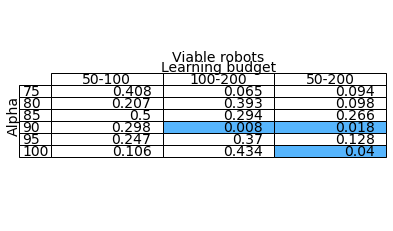

In [131]:
from scipy.stats import mannwhitneyu
table = []
colors = []
for exp in range(len(EXPERIMENTS)):
    row = []
    color = []
    print("---")
    stat,p = mannwhitneyu(bud_viable_robots[0][exp],bud_viable_robots[1][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    stat,p = mannwhitneyu(bud_viable_robots[1][exp],bud_viable_robots[2][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    stat,p = mannwhitneyu(bud_viable_robots[0][exp],bud_viable_robots[2][exp])
    print(round(p, 3))
    row.append(round(p, 3))
    if(0.05 < p):
        color.append("w")
    else:
        color.append("#56b5fd")
    table.append(row)
    colors.append(color)
fig, ax = plt.subplots()
fig.set_facecolor('white')
columns = ['50-100','100-200','50-200']
the_table = ax.table(cellText=table, cellColours=colors, loc='center', colLabels=columns, rowLabels=EXPERIMENTS)
ax.axis('off')
plt.text(-0.11,0.5,'Alpha',va='center',ha='center',rotation='vertical')
plt.text(0.5,0.7,'Learning budget', ha='center')
plt.text(0.5,0.8,'Viable robots', ha='center')
plt.savefig(REPOSITORY+'/ViableRobotsTable.png',dpi=200, bbox_inches='tight')

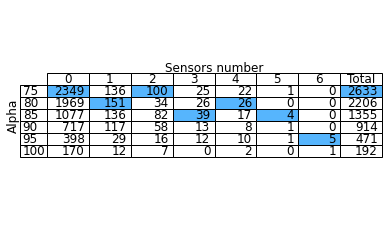

In [7]:
import math 
font = {'weight' : 'normal',
                    'size'   : 12.0}
plt.rc('font', **font)

labels = EXPERIMENTS
# labels = []
# for i in EXPERIMENTS:
#     temp = str(int(i)/100)
#     labels.append(temp)

columns = ['0','1','2','3','4','5','6','Total']
colors = []
for i in range(len(exp_mean)):
    temp_row = []
    for j in range(len(exp_mean[i])):
        if(exp_mean[i][j] < max(l[j] for l in exp_mean)):
            temp_row.append("w")
        else:
            temp_row.append("#56b5fd")

#         if(j == 0 or j == 7):
#             temp_row.append("w")
#         else:
#             temp_row.append([0, 0, 1.0,0.5*(exp_mean[i][j]/50)])
            
#         temp_row.append("w")

    colors.append(temp_row)
fig, ax = plt.subplots()
fig.set_facecolor('white')
the_table = ax.table(cellText=exp_mean, cellColours=colors, rowLabels=labels, colLabels=columns, loc='center')

plt.text(-0.1,0.5,'Alpha',va='center',ha='center',rotation='vertical')
ax.axis('off')

if(organ == 6):
    plt.text(0.5,0.7,'Wheels number', ha='center')
    plt.savefig(REPOSITORY+'/TableWheels.png',dpi=200, bbox_inches='tight')
if(organ == 7):
    plt.text(0.5,0.7,'Sensors number', ha='center')
    plt.savefig(REPOSITORY+'/TableSensors.png',dpi=200, bbox_inches='tight')
if(organ == 8):
    plt.text(0.5,0.7,'Joints number', ha='center')
    plt.savefig(REPOSITORY+'/TableJoints.png',dpi=200, bbox_inches='tight')

254
305
[[0.6 0.6 0.6 0.6 0.6 0.6 0.  0.  0.6]
 [0.6 0.6 0.6 0.  0.  0.  0.  0.  0. ]
 [0.8 0.6 0.6 0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.6 0.7 0.9 0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]
254
305
[[0.6 0.6 0.6 0.6 0.6 0.6 0.  0.  0.6]
 [0.6 0.6 0.6 0.6 0.  0.  0.  0.  0. ]
 [0.7 0.6 0.  0.  0.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.6 0.  0.  0.  0.  0.  0.  0. ]
 [0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]
254
254
[[0.6 0.6 0.6 0.6 0.6 0.6 0.  0.  0.6]
 [0.7 0.6 0.6 0.  0.  0.  0.  0.  0. ]
 [0.9 0.6 0.6 0.  0.  0.  0.  0.  0. ]
 [0.9 0.  0.6 0.  0.  0.  0.  0.  0. ]
 [1.  0.6 0.  0.  0.  0.  0.  0.  0. ]
 [0.9 0.7 0.  0.9 0.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.  0.  0.  0. ]

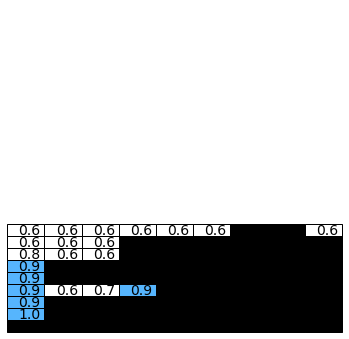

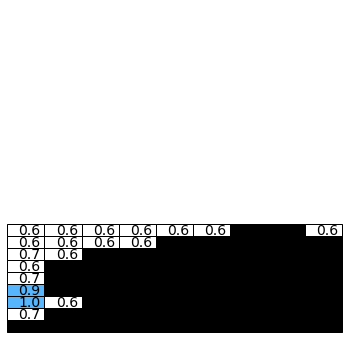

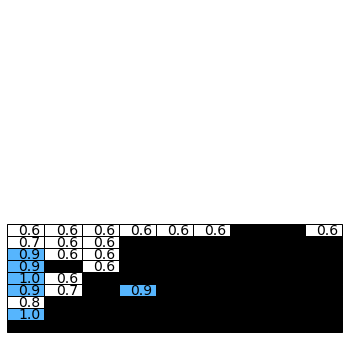

In [79]:

# print(bud_descriptors[bud][exp][rep])
# print(bud_descriptors[bud][exp][rep][5,1]*16)
for bud in range(len(BUDGETS)): 
#     print("-" + BUDGETS[bud])
    for exp in range(len(EXPERIMENTS)):
#         print("--" + EXPERIMENTS[bud])
        for rep in range(REPLICATES):
#             print("---",  rep)
            print(len(bud_fitness[bud][exp][rep]))
            print(len(bud_descriptors[bud][exp][rep]))
            x = np.zeros([9, 9])
            for ind in range(len(bud_fitness[bud][exp][rep])):
                tempFitness = bud_fitness[bud][exp][rep][ind]
                xIndex = int(bud_descriptors[bud][exp][rep][ind,6]*16)
                yIndex = int(bud_descriptors[bud][exp][rep][ind,7]*16)
#                 print(xIndex," ", yIndex)
                if(tempFitness > x[xIndex,yIndex]):
                    x[xIndex,yIndex] = round(tempFitness, 1)
#                 print(int(bud_descriptors[bud][exp][rep][ind,6]*16))
            print(x)
            colors = []
            for i in range(len(x)):
                temp_row = []
                for j in range(len(x[i])):
                    if(0.85 < x[i,j]):
                        temp_row.append("#56b5fd")
                    else:
                        if(0.3 < x[i,j]):
                            temp_row.append("w")
                        else:
                            temp_row.append("k")
                        
                colors.append(temp_row)
            fig, ax = plt.subplots()
            fig.set_facecolor('white')
            the_table = ax.table(cellText=x, cellColours=colors)
            ax.axis('off')